
# **TRABALHO FINAL - INTRODUÇÃO AO R**

<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

**Prof. Ricardo Carubbi**<br>
GRUPO: </br>
Carlos Felipe Carneiro Soares/<i>Matricula:2317761 </i></br>
Diego Barbosa Fontes /<i>Matricula:2318610 </i></br>
Guilherme Terceiro Cunha/<i>Matricula:2317862 </i></br>
Felipe Gomes Batista /<i>Matricula:2317633 </i></br>



# Preparação do Dataset

## Carregando o Dataset

In [1]:
# Procedimento usual na instalação de pacotes
install.packages(
    pkgs = 'pacman',
    lib = '/usr/local/lib/R/site-library'
)


In [2]:
# Procedimento usual no carregamento de pacotes já instalados
library(package = 'pacman')
# Instala e/ou carraga demais pacotes
p_load('tidyverse','gridExtra','ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


gridExtra installed



In [3]:
# Usando o pacote 'pacman', a função 'p_load' instala, caso não esteja
# previamente, e carrega automaticamente os pacotes definidos
pacman::p_load('ggplot2','gridExtra')

In [4]:
# Retorna a pasta atual de trabalho do Colab
getwd()

[1] "/content"

In [5]:
# Download de arquivos do Google Drive.
# Link Google drive: https://drive.google.com/file/d/1U1eVN0vvRBLHA1dXnjfBdfvGPB8jdyk_/view?usp=share_link
system('gdown --id 1U1eVN0vvRBLHA1dXnjfBdfvGPB8jdyk_')

In [6]:
# Carrega o arquivos 'csv' separados por ';' e variáveis (colunas) do tipo "character"
IHDP <- read.csv(
    file = '/content/ihdp.csv',
    sep = ';',
    colClasses = 'character'
)
head(IHDP)

idade etnia  edu              trab prenatal cigarro alcool genero    primog
1 33    branca superior         sim  sim      nao     nao    masculino nao   
2 22    negra  medio_incompleto nao  sim      nao     sim    masculino nao   
3 13    negra  medio_incompleto nao  sim      nao     nao    masculino sim   
4 25    negra  superior         sim  sim      nao     nao    masculino sim   
5 19    negra  medio_incompleto nao  sim      sim     nao    masculino nao   
6 19    negra  medio            sim  sim      sim     sim    feminino  sim   
  peso premat hosp renda trt  QI 
1 1559 10     31   42500 caso 111
2 2240 3      4    5000  caso 81 
3 1900 6      9    12500 caso 92 
4 1550 8      50   42500 caso 103
5 2270 5      4    5000  caso 81 
6 1550 4      13   12500 caso 94

## Preparando os dados para análise

In [7]:
#ajustando o tamanho da janela
options(width = 150)

In [8]:
# Nome das colunas em maiúsculo com a função toupper.
colnames(IHDP) <- toupper(colnames(IHDP))
head(IHDP,3)

IDADE ETNIA  EDU              TRAB PRENATAL CIGARRO ALCOOL GENERO    PRIMOG PESO PREMAT HOSP RENDA TRT  QI 
1 33    branca superior         sim  sim      nao     nao    masculino nao    1559 10     31   42500 caso 111
2 22    negra  medio_incompleto nao  sim      nao     sim    masculino nao    2240 3      4    5000  caso 81 
3 13    negra  medio_incompleto nao  sim      nao     nao    masculino sim    1900 6      9    12500 caso 92

In [9]:
# Conversão das colunas 'idade','peso','premat','hosp','renda' e 'QI'
# para variáveis numéricas e inteiras

# Vetor de colunas a serem convertidas em inteiro
col_int <- c('IDADE','PESO','PREMAT','HOSP','RENDA','QI')

# Iterar coluna a coluna e realizar a conversão
for (col in col_int) {
    IHDP[,col] <- as.integer(IHDP[,col])
}

# Retornar o dataframe resultante
str(IHDP)

'data.frame':	4381 obs. of  15 variables:
 $ IDADE   : int  33 22 13 25 19 19 26 20 23 28 ...
 $ ETNIA   : chr  "branca" "negra" "negra" "negra" ...
 $ EDU     : chr  "superior" "medio_incompleto" "medio_incompleto" "superior" ...
 $ TRAB    : chr  "sim" "nao" "nao" "sim" ...
 $ PRENATAL: chr  "sim" "sim" "sim" "sim" ...
 $ CIGARRO : chr  "nao" "nao" "nao" "nao" ...
 $ ALCOOL  : chr  "nao" "sim" "nao" "nao" ...
 $ GENERO  : chr  "masculino" "masculino" "masculino" "masculino" ...
 $ PRIMOG  : chr  "nao" "nao" "sim" "sim" ...
 $ PESO    : int  1559 2240 1900 1550 2270 1550 2330 2410 1776 2140 ...
 $ PREMAT  : int  10 3 6 8 5 4 9 3 6 5 ...
 $ HOSP    : int  31 4 9 50 4 13 8 6 30 2 ...
 $ RENDA   : int  42500 5000 12500 42500 5000 12500 17500 11344 30000 8750 ...
 $ TRT     : chr  "caso" "caso" "caso" "caso" ...
 $ QI      : int  111 81 92 103 81 94 104 82 107 79 ...


In [10]:
# Conversão das colunas restantes do tipo caractere para variáveis categóricas
# conhecidos como fatores no R.
cols <- colnames(IHDP)
for (col in cols) {
    if (is.character(IHDP[,col])) {
        IHDP[,col] <- as.factor(IHDP[,col])
    }
}

str(IHDP)

'data.frame':	4381 obs. of  15 variables:
 $ IDADE   : int  33 22 13 25 19 19 26 20 23 28 ...
 $ ETNIA   : Factor w/ 3 levels "branca","hispanica",..: 1 3 3 3 3 3 1 1 1 3 ...
 $ EDU     : Factor w/ 4 levels "medio","medio_incompleto",..: 3 2 2 3 2 1 2 2 1 1 ...
 $ TRAB    : Factor w/ 2 levels "nao","sim": 2 1 1 2 1 2 2 1 2 2 ...
 $ PRENATAL: Factor w/ 2 levels "nao","sim": 2 2 2 2 2 2 2 2 2 2 ...
 $ CIGARRO : Factor w/ 2 levels "nao","sim": 1 1 1 1 2 2 2 2 1 2 ...
 $ ALCOOL  : Factor w/ 2 levels "nao","sim": 1 2 1 1 1 2 1 2 1 1 ...
 $ GENERO  : Factor w/ 2 levels "feminino","masculino": 2 2 2 2 2 1 2 1 1 2 ...
 $ PRIMOG  : Factor w/ 2 levels "nao","sim": 1 1 2 2 1 2 1 1 1 1 ...
 $ PESO    : int  1559 2240 1900 1550 2270 1550 2330 2410 1776 2140 ...
 $ PREMAT  : int  10 3 6 8 5 4 9 3 6 5 ...
 $ HOSP    : int  31 4 9 50 4 13 8 6 30 2 ...
 $ RENDA   : int  42500 5000 12500 42500 5000 12500 17500 11344 30000 8750 ...
 $ TRT     : Factor w/ 2 levels "caso","controle": 1 1 1 1 1 1 1 1 1 1 ..



## Categorização das Variáveis

In [11]:
# Estratificacao da  'PREMATURIDADE' dos filhos
labels <- c('postermo', 'ausente', 'moderada', 'alta', 'extrema')
breaks <- c(-Inf, 0, 1, 6, 9, Inf)
PREMATCAT <- cut(
    IHDP[,'PREMAT'],
    breaks,
    labels,
    right = FALSE
   )
IHDP$prematCAT <- PREMATCAT # IHDP[,'prematCAT'] <- prematCAT
table(IHDP$prematCAT)



postermo  ausente moderada     alta  extrema 
     707      200     3165      242       67 

In [12]:
# Estratificação de 'PESO'
labels <- c('baixo','normal')
breaks <- c(-Inf, 2500, Inf)
pesoCAT <- cut(
    IHDP[,'PESO'],
    breaks,
    labels,
    right = T
   )
IHDP$pesoCAT <- pesoCAT # IHDP[,'pesoCAT'] <- pesoCAT
table(IHDP$pesoCAT)


 baixo normal 
   590   3791 

In [13]:
# Estratificação de 'RENDA'
labels <- c('baixa', 'media', 'alta')
breaks <- c(-Inf, 50000, 150000, Inf)
rendaCAT <- cut(
    IHDP[,'RENDA'],
    breaks,
    labels,
    right = T
   )
IHDP$rendaCAT <- rendaCAT # IHDP[,'rendaCAT'] <- rendaCAT
table(IHDP$rendaCAT)



baixa media  alta 
 3974   346    61 

In [14]:
# Categorizacao de QI
labels <- c('baixa', 'media', 'alta')
breaks <- c(-Inf, 90, 110, Inf)
qiCAT <- cut(
    IHDP[,'QI'],
    breaks,
    labels,
    right = TRUE
   )
IHDP$qiCAT <- qiCAT
table(IHDP$qiCAT)


baixa media  alta 
 2414  1525   442 

In [15]:
# Categorização da Hospitalizacao
HOSP_cat <- cut(
    x = IHDP[,'HOSP'], # IHDP$HOSP
    breaks = c(-Inf, 0, 2, 4, +Inf),
    labels = c('Ausente','Baixa','Media','Alta'),
    right = TRUE
)
IHDP$hospCAT <- HOSP_cat
table(IHDP$hospCAT)
head(IHDP)


Ausente   Baixa   Media    Alta 
    117    1201    1814    1249 

IDADE ETNIA  EDU              TRAB PRENATAL CIGARRO ALCOOL GENERO    PRIMOG PESO PREMAT HOSP RENDA TRT  QI  prematCAT pesoCAT rendaCAT qiCAT
1 33    branca superior         sim  sim      nao     nao    masculino nao    1559 10     31   42500 caso 111 extrema   baixo   baixa    alta 
2 22    negra  medio_incompleto nao  sim      nao     sim    masculino nao    2240  3      4    5000 caso  81 moderada  baixo   baixa    baixa
3 13    negra  medio_incompleto nao  sim      nao     nao    masculino sim    1900  6      9   12500 caso  92 alta      baixo   baixa    media
4 25    negra  superior         sim  sim      nao     nao    masculino sim    1550  8     50   42500 caso 103 alta      baixo   baixa    media
5 19    negra  medio_incompleto nao  sim      sim     nao    masculino nao    2270  5      4    5000 caso  81 moderada  baixo   baixa    baixa
6 19    negra  medio            sim  sim      sim     sim    feminino  sim    1550  4     13   12500 caso  94 moderada  baixo   baixa    media
  hospCAT
1 Alta   
2 Media  
3 Alta   
4 Alta   
5 Media  
6 Alta

## Separacao por tipo de tratamento

In [16]:
# Dataframe de pacientes do grupo de tratamento controle ou grupo controle
CTRL <- subset(IHDP, TRT=='controle')
head(CTRL,3)

IDADE ETNIA  EDU              TRAB PRENATAL CIGARRO ALCOOL GENERO    PRIMOG PESO PREMAT HOSP RENDA TRT      QI prematCAT pesoCAT rendaCAT qiCAT
291 19    branca medio_incompleto sim  sim      sim     nao    masculino sim    4592  0     8    17000 controle 97 ausente   normal  baixa    media
292 22    branca medio_incompleto nao  sim      nao     sim    masculino nao    4082 -1     3     9750 controle 99 postermo  normal  baixa    media
293 24    branca medio_incompleto nao  sim      sim     nao    masculino nao    3175  3     5    30000 controle 94 moderada  normal  baixa    media
    hospCAT
291 Alta   
292 Media  
293 Alta

In [17]:
# Dataframe de pacientes do grupo de tratamento caso ou grupo caso
CASO <- subset(IHDP, TRT=='caso')
head(CASO,3)

IDADE ETNIA  EDU              TRAB PRENATAL CIGARRO ALCOOL GENERO    PRIMOG PESO PREMAT HOSP RENDA TRT  QI  prematCAT pesoCAT rendaCAT qiCAT
1 33    branca superior         sim  sim      nao     nao    masculino nao    1559 10     31   42500 caso 111 extrema   baixo   baixa    alta 
2 22    negra  medio_incompleto nao  sim      nao     sim    masculino nao    2240  3      4    5000 caso  81 moderada  baixo   baixa    baixa
3 13    negra  medio_incompleto nao  sim      nao     nao    masculino sim    1900  6      9   12500 caso  92 alta      baixo   baixa    media
  hospCAT
1 Alta   
2 Media  
3 Alta

## Funções

In [18]:
# Função utilizada na questão 1
# Função que retorna um dataframe com as características básicas dos estratos
# dos pacientes de variáveis contínuas
stats_cont <- function(var) {

    # Largura máxima de 150 caracteres
    options(width = 200)

    # Função que calcula a mediana, 1o quartil e 3o quartil.
    # Parâmetros (vec): Vetor de variáveis contínuas.
    # Saída (char): Caracteres no formata mediana (1o quartil - 3o quartil).

    # Interrompe a execução se a variável não for numérica
    stopifnot(is.numeric(var))

    # Estatísticas da variável
    var_stats <- summary(var)

    # Retorna e formata o 1o quartil
    q1 <- var_stats[['1st Qu.']]
    q1_out <- format(q1, nsmall = 0)

    # Retorna e formata o 3o quartil
    q3 <- var_stats[['3rd Qu.']]
    q3_out <- format(q3, nsmall = 0)

    # Retorna e formata a mediana
    med <- var_stats[['Median']]
    med_out <- format(med, nsmall = 0)

    # Formata a saída
    out <- paste(med_out,'(',q1_out,'-',q3_out,')',sep='')

    return(out)
}

In [19]:
# Função utilizada na questão 1
# Função que retorna um dataframe com as características básicas dos estratos
# dos pacientes de variáveis categóricas
stats_categ <- function(var1,var2,var3,labels) {

    # Largura máxima de 150 caracteres
    options(width = 150)

    # Função que calcula a mediana, 1o quartil e 3o quartil.
    # Parâmetros (vec): Vetor de variáveis contínuas.
    # Saída (char): Caracteres no formata mediana (1o quartil - 3o quartil).

    # Interrompe a execução se a variável não for numérica
    stopifnot(is.factor(var1) && is.factor(var2) && is.factor(var3))

    # Estatísticas da variável
    # Dataset Geral
    tabela1 <- table(var1)
    tabela2 <- prop.table(tabela1)
    tabela2 <- round(tabela2*100,2)
    # Dataset CONTROLE
    tabela3 <- table(var2)
    tabela4 <- prop.table(tabela3)
    tabela4 <- round(tabela4*100,2)
    # Dataset CASO
    tabela5 <- table(var3)
    tabela6 <- prop.table(tabela5)
    tabela6 <- round(tabela6*100,2)

    # Vetor para armazenar valores
    vet_arm = c()

    # Formata a saída
    for (label in labels) {
      out1 <- paste(tabela1[label],'(',tabela2[label],'%)',sep='')
      out2 <- paste(tabela3[label],'(',tabela4[label],'%)',sep='')
      out3 <- paste(tabela5[label],'(',tabela6[label],'%)',sep='')
      vet_arm <- c(vet_arm, out1, out2, out3)
    }

    return(vet_arm)
}

In [20]:
# Função utilizada na questão 1
# Função final para imprimir a matriz
matrix_stats <- function(ds_geral,ds_ctrl,ds_caso) {

  # Definindo o nome das colunas da matrix
  col_names = c('Geral', 'Controle', 'Caso')

  # Iniciando o vetor para alocar os nomes dos índices
  row_names = c()

  # Iniciando o vetor para alocar os valores da matrix
  val_mat = c()

  # For para iterar entre as colunas
  for (col in colnames(ds_geral)) {

    # Não há necessidade de incluir o TRT
    if (col == 'TRT' | col == "prematCAT" | col == "qiCAT" | col == "pesoCAT"
        | col == "rendaCAT" | col == "hospCAT"){
      next
      # Verifica as colunas inteiras
    } else if (is.integer(ds_geral[,col])) {
      # Aplica a função que retorno com a saída formatada
      a1 <- stats_cont(ds_geral[,col])
      a2 <- stats_cont(ds_ctrl[,col])
      a3 <- stats_cont(ds_caso[,col])
      val_mat <- c(val_mat, a1, a2, a3)

      # Acrescenta o index da linha
      row_names <- c(row_names, col)

      # Verifica as colunas categóricas
    } else if (is.factor(ds_geral[,col])) {

      # Acrescenta o index da linha
      labels <- levels(ds_geral[,col])
      row_names_categ <- paste(col,labels, sep='_')
      row_names <- c(row_names, row_names_categ)

      # Aplica a função que retorno com a saída formatada
      vet_arm <- stats_categ(ds_geral[,col],ds_ctrl[,col],ds_caso[,col],labels)
      val_mat <- c(val_mat, vet_arm)
    }
  }

  # Cria a matriz, nomeia as colunas e a coluna index
  mat <- matrix(data=val_mat, ncol=3, byrow = T)
  colnames(mat) <- col_names
  rownames(mat) <- row_names
  print(mat)
}

In [21]:
# Função utilizada na questão 2
#Funcao para calcular os IQR, passando o dataset e a variavel a ser analisada
outlier_iqr <- function(data, variable, threshold = 1.5) {
  Q1 <- quantile(data[[variable]], probs = 0.25) #primeiro quartil
  Q3 <- quantile(data[[variable]], probs = 0.75) # terceiro quartil
  IQR <- Q3 - Q1 #indice
  LimInf <- Q1 - threshold * IQR #limite inferior
  LimSup <- Q3 + threshold * IQR #limite superior

  outliers <- data[data[[variable]] < LimInf | data[[variable]]
                                    > LimSup, ]

  result <- list(
    IQR = IQR,
    LimInf = LimInf,
    LimSup = LimSup,
    outliers = outliers
  )

  return(result)
}

In [22]:
# Função utilizada na questão 2
# Função de balanceamento por subamostragem
balDataset <- function(df,var) {

    # Reprodução do resultado
    set.seed(1)

    # Condição da variável var
    lvar <- levels(df[,var])

    if (length(lvar)==2) {

        # Separação em dataframes por categoria
        dfA <- df[df[,var]==lvar[1],]
        dfB <- df[df[,var]==lvar[2],]

        # Junção dos dataframes
        ns <- min(nrow(dfA), nrow(dfB))
        tmp <- rbind(
            sample_n(dfA,ns),
            sample_n(dfB,ns)
        )

        return(tmp)

    } else {
        cat(
            'Variável', var, 'possui', length(lvar), 'levels.',
            'Apenas variáveis com 2 levels são aceitas!'
        )
    }
}

In [23]:
# Função utilizada na questão 3
#Função para gerar o gráfico de barras
generate_bar_plots <- function(data) {
  # Abre o arquivo
  # png('HospBar.png', width = 800, height = 600)
  # pdf('HospBar.pdf', width = 8, height = 6)

  # Define área e resolução de saída da plotagem do gráfico
  options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 150)

  # Gráfico de barra com pacote GRAPHICS
  # https://r-graph-gallery.com/38-rcolorbrewers-palettes.html
  # https://htmlcolorcodes.com/color-chart/
  pacman::p_load('RColorBrewer')


  # Encontra o índice da coluna "TRT"
  trt_column <- which(colnames(data) == "TRT")
  num_columns <- ncol(data)

  for (i in 1:num_columns) {
    #filtra a coluna trt e se a coluna é categórica
    if (i != trt_column && is.factor(data[, i])) {
      col_name <- colnames(data)[i]

      trt_values <- data[, trt_column]
      col_values <- data[, i]

      #frequência absoluta
      tabH <- table(col_values, trt_values)
      colors <- brewer.pal(n = length(tabH), name = "Dark2")
      bp <- barplot(
          t(tabH),
          beside = TRUE,
          ylim = c(0,max(tabH)+100),
          col = colors[1:2],
          border = '#FFFFFF',
          main = paste("TRT X ", col_name),
          ylab = "Freq",
          legend = T
        )
      # Rótulos
      text(x= bp, y= t(tabH)+10, labels = t(tabH))
    }
  }
}


# 1.   QUESTÃO (3,0 Pontos)

Crie uma matriz ou dataframe com as características básicas dos estratos dos pacientes descrevendo as variáveis contínuas, como mediana, 1” quartil e 3” quartil, e variáveis categóricas como frequência e porcentagem.




In [24]:
#Chama a função matrix_stats, onde se passa os 3 dataframes, tendo como saida
#a mediana, o 1 quartil, e o 3 quartil, alem das frequencias
matrix_stats(IHDP,CTRL,CASO)

                        Geral               Controle              Caso               
IDADE                   "24(21-26)"         "24(21-26)"           "24(20-28)"        
ETNIA_branca            "2176(49.67%)"      "2059(50.33%)"        "117(40.34%)"      
ETNIA_hispanica         "900(20.54%)"       "873(21.34%)"         "27(9.31%)"        
ETNIA_negra             "1305(29.79%)"      "1159(28.33%)"        "146(50.34%)"      
EDU_medio               "1820(41.54%)"      "1738(42.48%)"        "82(28.28%)"       
EDU_medio_incompleto    "1358(31%)"         "1232(30.11%)"        "126(43.45%)"      
EDU_superior            "366(8.35%)"        "332(8.12%)"          "34(11.72%)"       
EDU_superior_incompleto "837(19.11%)"       "789(19.29%)"         "48(16.55%)"       
TRAB_nao                "1670(38.12%)"      "1551(37.91%)"        "119(41.03%)"      
TRAB_sim                "2711(61.88%)"      "2540(62.09%)"        "171(58.97%)"      
PRENATAL_nao            "65(1.48%)"         "52(1.27%)

# 2.   QUESTÃO (3,0 Pontos)

Aplique e justifique uma estratégia para balancear os grupos caso e controle de forma que sejam semelhantes em suas características antes do tratamento.



### Análise dos Outliers e Aplicação da estratégia

Foram analisados os outliers dos dados de forma geral, considerando os Intervalos entre os quartis.

In [25]:
#Análise dos outliers da VARIÁVEL IDADE
iqr_outliers_result <- outlier_iqr(IHDP,"IDADE")
cat("IQR:", iqr_outliers_result$IQR, "\n")
cat("Limite Inferior:", iqr_outliers_result$LimInf, "\n")
cat("Limite Superior:", iqr_outliers_result$LimSup, "\n")
cat("Outliers:", nrow(iqr_outliers_result$outliers), "\n")
print(iqr_outliers_result$outliers)
#DATASET BALANCEADO
IHDP_noOut <- subset(IHDP, IDADE >= iqr_outliers_result$LimInf &
                         IDADE <= iqr_outliers_result$LimSup)



IQR: 5 
Limite Inferior: 13.5 
Limite Superior: 33.5 
Outliers: 24 
    IDADE     ETNIA                 EDU TRAB PRENATAL CIGARRO ALCOOL    GENERO PRIMOG PESO PREMAT HOSP RENDA  TRT  QI prematCAT pesoCAT rendaCAT qiCAT hospCAT
3      13     negra    medio_incompleto  nao      sim     nao    nao masculino    sim 1900      6    9 12500 caso  92      alta   baixo    baixa media    Alta
45     36 hispanica    medio_incompleto  nao      sim     nao    nao masculino    nao 1790      9   18  5000 caso  66   extrema   baixo    baixa baixa    Alta
63     37    branca    medio_incompleto  nao      sim     nao    nao masculino    nao 2130      5    5 12500 caso  75  moderada   baixo    baixa baixa    Alta
92     36    branca            superior  sim      sim     sim    nao masculino    sim 1786      8   19 42500 caso  89      alta   baixo    baixa baixa    Alta
93     34     negra               medio  sim      sim     sim    nao  feminino    nao 1670      6   14  6250 caso  87      alta   baixo  

Ao analisar a idade vimos que todos os outliers são do grupo caso, para essa análise, esses outliers serão removidos. Essa abordagem visa se concentrar em hipoteticamente nas mães que apresentam uma idade com menor risco para os seus bebês. Como a estratégia de balanceamento não pode envolver a variável "PESO",
"PREMATURIDADADE" e "QI". A variável Hospitalidade também foi analisada os seus outliers, contudo não faz sentido retirar os seus outliers, principalmente do grupo CASO em que os bebês receberam tratamento para melhorar o QI, e nem do Controle, pois de certo modo posso está enviezando os dados.

In [26]:
#Análise dos outliers da VARIÁVEL HOSPITALIDADE
iqr_outliers_result <- outlier_iqr(IHDP,"HOSP")
cat("IQR:", iqr_outliers_result$IQR, "\n")
cat("Limite Inferior:", iqr_outliers_result$LimInf, "\n")
cat("Limite Superior:", iqr_outliers_result$LimSup, "\n")
cat("Outliers:", nrow(iqr_outliers_result$outliers), "\n")
print(iqr_outliers_result$outliers)


IQR: 3 
Limite Inferior: -2.5 
Limite Superior: 9.5 
Outliers: 389 
     IDADE     ETNIA                 EDU TRAB PRENATAL CIGARRO ALCOOL    GENERO PRIMOG PESO PREMAT HOSP   RENDA      TRT  QI prematCAT pesoCAT rendaCAT qiCAT hospCAT
1       33    branca            superior  sim      sim     nao    nao masculino    nao 1559     10   31   42500     caso 111   extrema   baixo    baixa  alta    Alta
4       25     negra            superior  sim      sim     nao    nao masculino    sim 1550      8   50   42500     caso 103      alta   baixo    baixa media    Alta
6       19     negra               medio  sim      sim     sim    sim  feminino    sim 1550      4   13   12500     caso  94  moderada   baixo    baixa media    Alta
9       23    branca               medio  sim      sim     nao    nao  feminino    nao 1776      6   30   30000     caso 107      alta   baixo    baixa media    Alta
12      23     negra               medio  sim      sim     nao    nao  feminino    nao 1550      7   2

Foi abordado também como estratégia, as retiradas dos outliers da renda, visto
que mães que possuem uma renda elevada pode oferecer outros tipos de tratamento
para o bebê. E também de rendas muito baixas, visto que isso pode afetar a alimentação da mãe, durante a gestação, quanto do bebê durante o seu desenvolvimento até os três anos. Sendo retirado dessa forma 6 dados do grupo CASO, e 244 do grupo Controle.

In [27]:
#Análise dos outliers da VARIÁVEL RENDA
iqr_outliers_result <- outlier_iqr(IHDP_noOut,"RENDA")
cat("IQR:", iqr_outliers_result$IQR, "\n")
cat("Limite Inferior:", iqr_outliers_result$LimInf, "\n")
cat("Limite Superior:", iqr_outliers_result$LimSup, "\n")
cat("Outliers:", nrow(iqr_outliers_result$outliers), "\n")
print(iqr_outliers_result$outliers)
#DATASET BALANCEADO
IHDP_noOut <- subset(IHDP_noOut, RENDA >= iqr_outliers_result$LimInf &
                         RENDA <= iqr_outliers_result$LimSup)


IQR: 23392 
Limite Inferior: -27360 
Limite Superior: 66208 
Outliers: 250 
     IDADE     ETNIA                 EDU TRAB PRENATAL CIGARRO ALCOOL    GENERO PRIMOG PESO PREMAT HOSP   RENDA      TRT  QI prematCAT pesoCAT rendaCAT qiCAT hospCAT
87      27     negra    medio_incompleto  sim      sim     sim    sim masculino    nao 1640      3   15  -27683     caso  69  moderada   baixo    baixa baixa    Alta
118     22     negra    medio_incompleto  nao      sim     sim    nao  feminino    nao 2190      6    4   83749     caso  93      alta   baixo    media media   Media
164     28     negra            superior  sim      nao     sim    sim  feminino    nao 2360      6    3  124700     caso 118      alta   baixo    media  alta   Media
213     28    branca superior_incompleto  sim      sim     nao    nao  feminino    sim 1630      8   28  150885     caso 113      alta   baixo     alta  alta    Alta
216     28    branca superior_incompleto  sim      sim     nao    nao  feminino    nao 2030   

Após as retiradas dos outliers, será observado os desbalanceamento dos dados relacionados ao Grupo de tratamento

### Balanceamento

In [28]:
# Verificação do desbalanceamento
table(IHDP_noOut$TRT)


    caso controle 
     260     3847 

In [29]:
# Balanceamento por subamostragem (downsampling)
IHPD_bal <- balDataset(IHDP_noOut,'TRT')

# Verificação do downsampling
table(IHPD_bal$TRT)


    caso controle 
     260      260 

In [30]:
# Separar CONTROLE
CTRL_bal <- subset(IHPD_bal, TRT=='controle')

In [31]:
# Separar CASO
CASO_bal <- subset(IHPD_bal, TRT=='caso')

In [32]:
# Verificação dos desbalanceamento nos subestratos
matrix_stats(IHPD_bal,CTRL_bal,CASO_bal)

                        Geral                  Controle                 Caso                 
IDADE                   "23(21-27)"            "24(22-26)"              "23(19-27)"          
ETNIA_branca            "223(42.88%)"          "120(46.15%)"            "103(39.62%)"        
ETNIA_hispanica         "73(14.04%)"           "49(18.85%)"             "24(9.23%)"          
ETNIA_negra             "224(43.08%)"          "91(35%)"                "133(51.15%)"        
EDU_medio               "183(35.19%)"          "105(40.38%)"            "78(30%)"            
EDU_medio_incompleto    "196(37.69%)"          "81(31.15%)"             "115(44.23%)"        
EDU_superior            "48(9.23%)"            "23(8.85%)"              "25(9.62%)"          
EDU_superior_incompleto "93(17.88%)"           "51(19.62%)"             "42(16.15%)"         
TRAB_nao                "217(41.73%)"          "106(40.77%)"            "111(42.69%)"        
TRAB_sim                "303(58.27%)"          "154(59.23%)"

Podemos observar que nos subestratos, conseguimos um bom balanceamento dos dados, com a exceção da variável álcool, que o comportamento ficou oposto para os dois subestratos.  

# 3.   QUESTÃO (1,5 Pontos)

Comprove graficamente sua estratégia de balanceamento.






In [33]:
# Freqência absoluta
tabH <- table(IHPD_bal$TRT)
tabH


    caso controle 
     260      260 

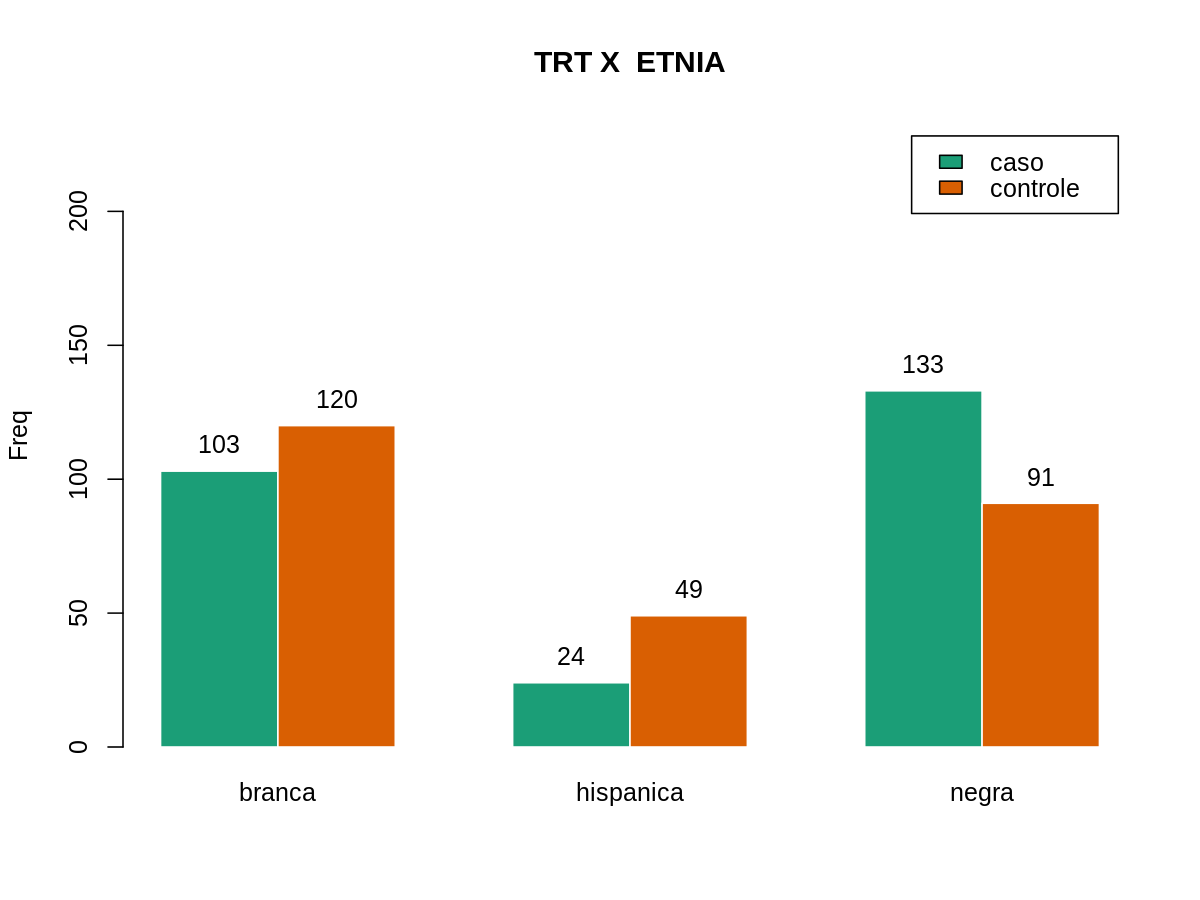

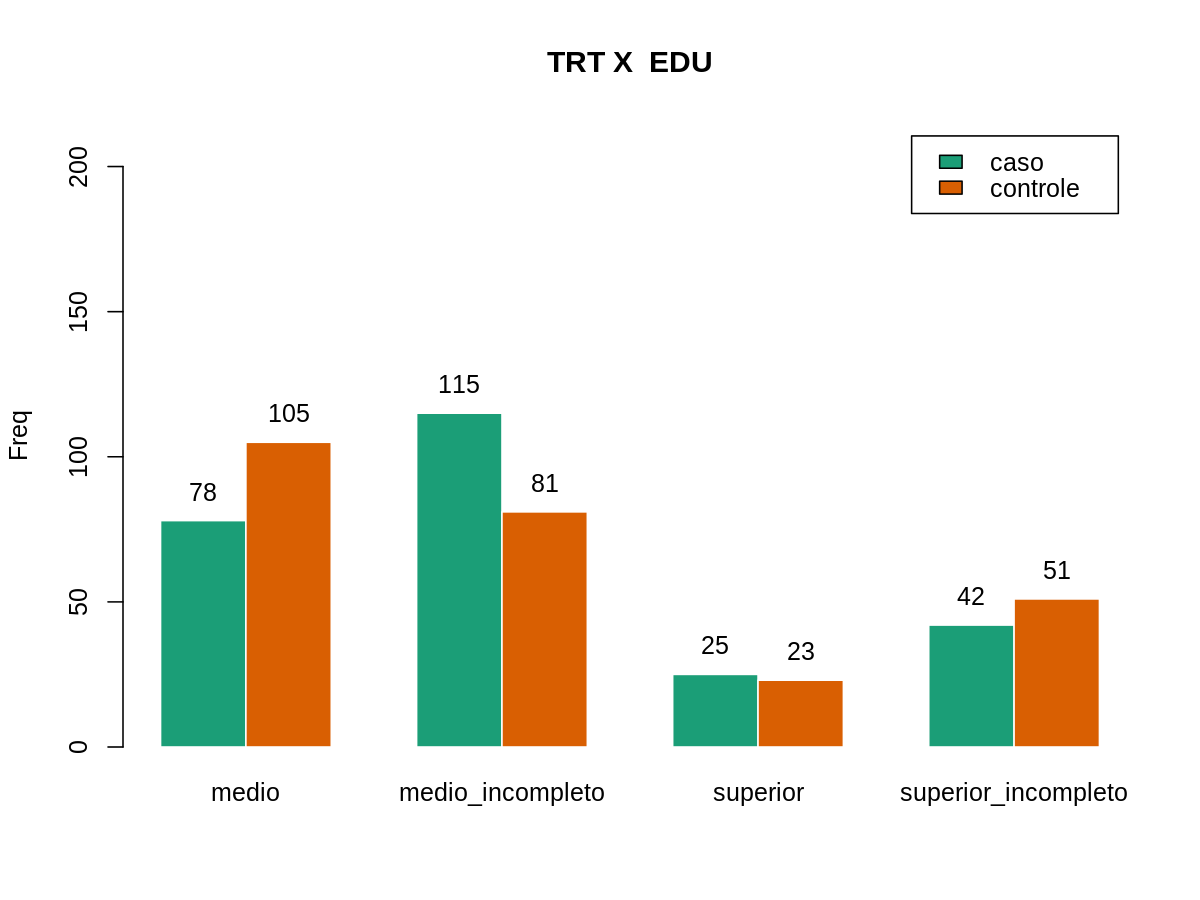

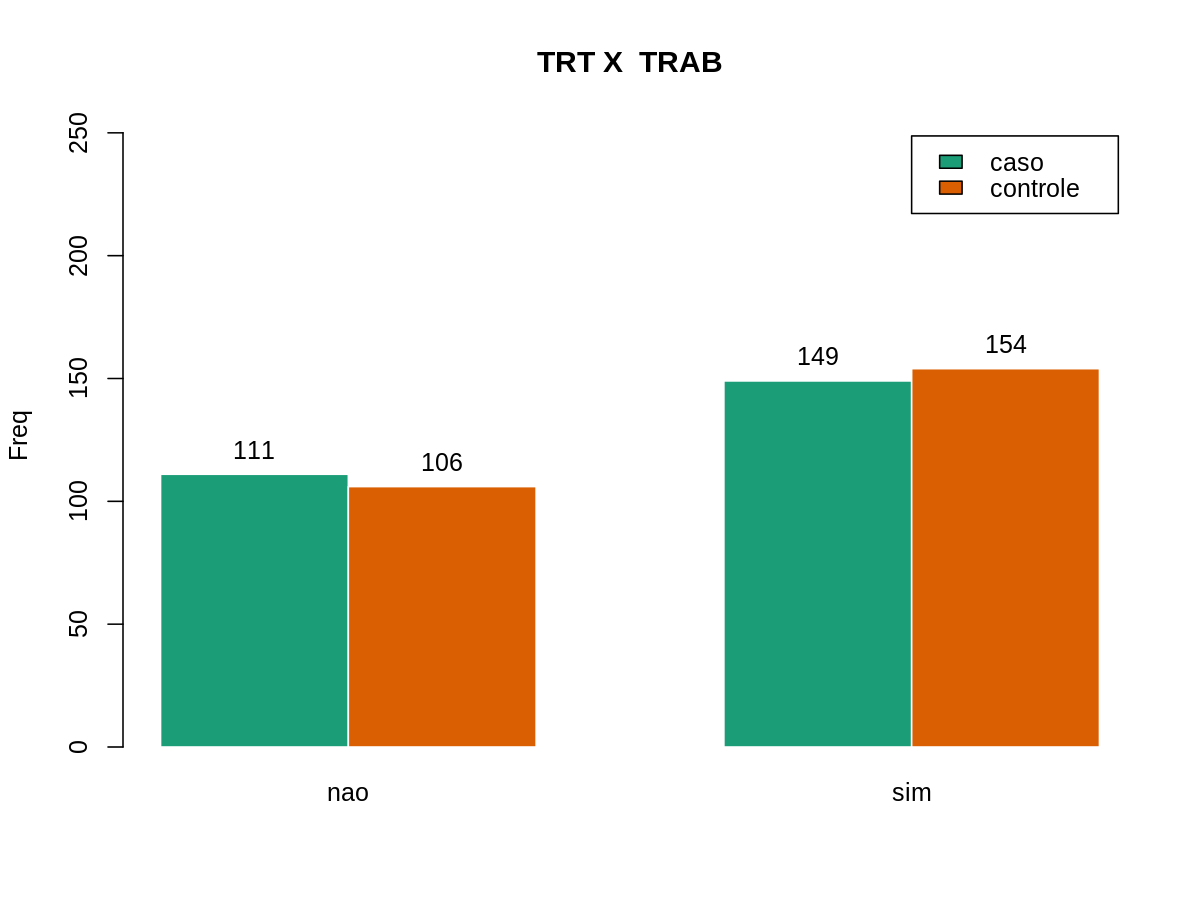

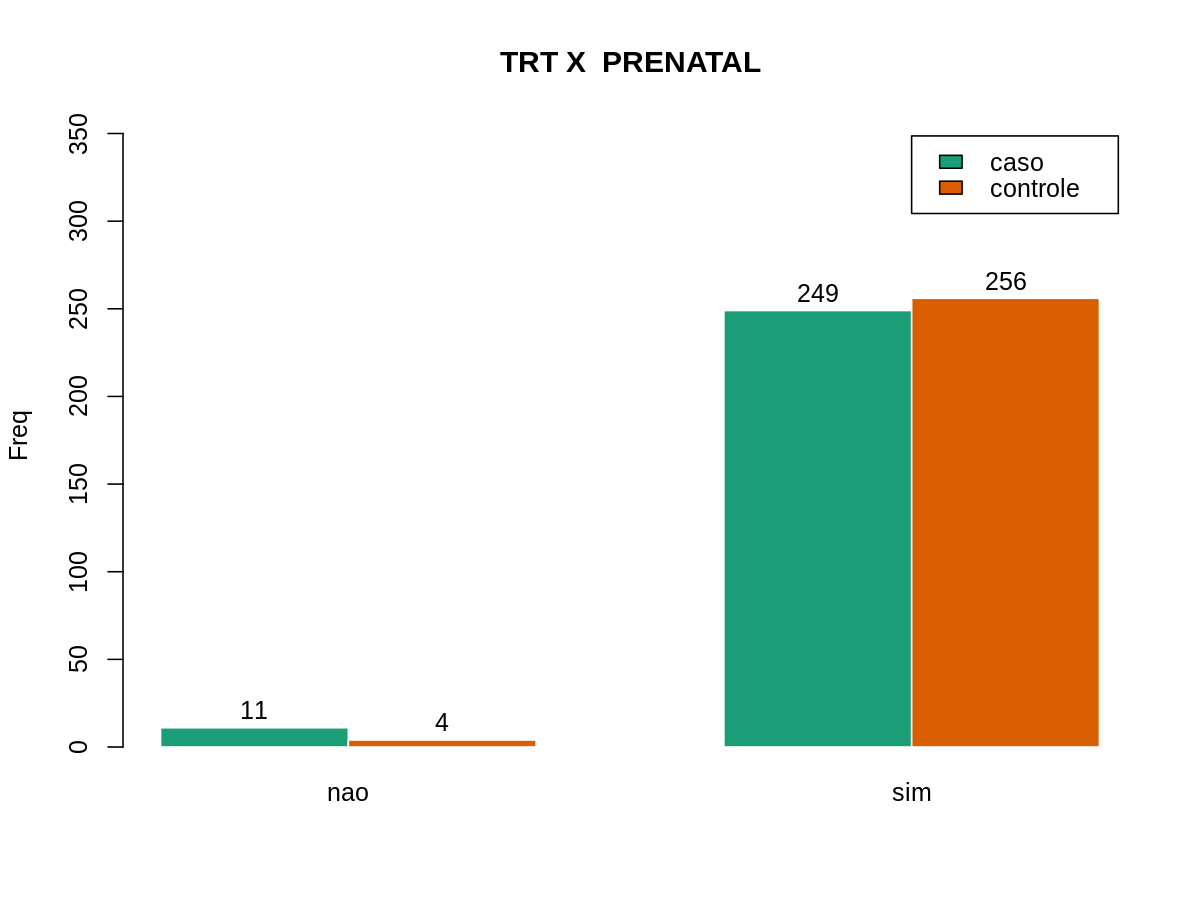

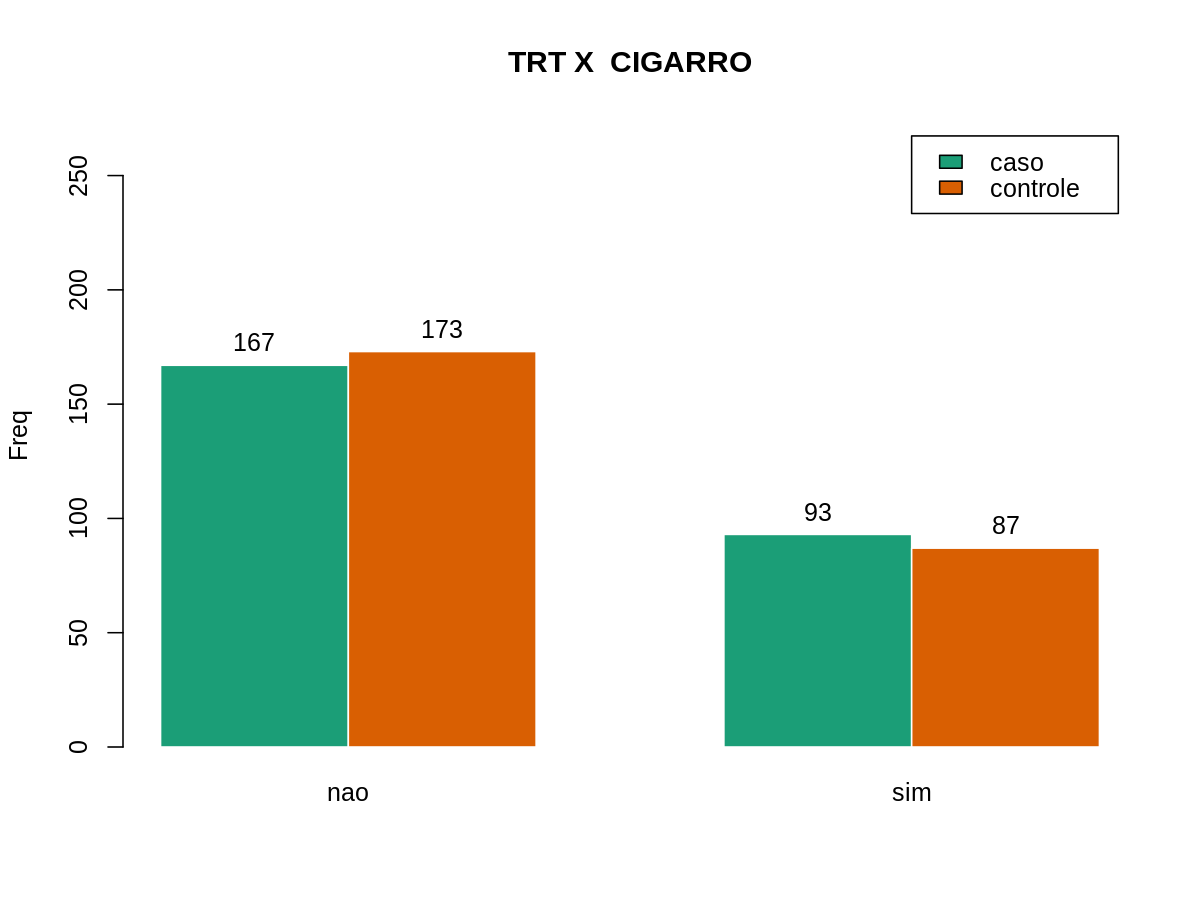

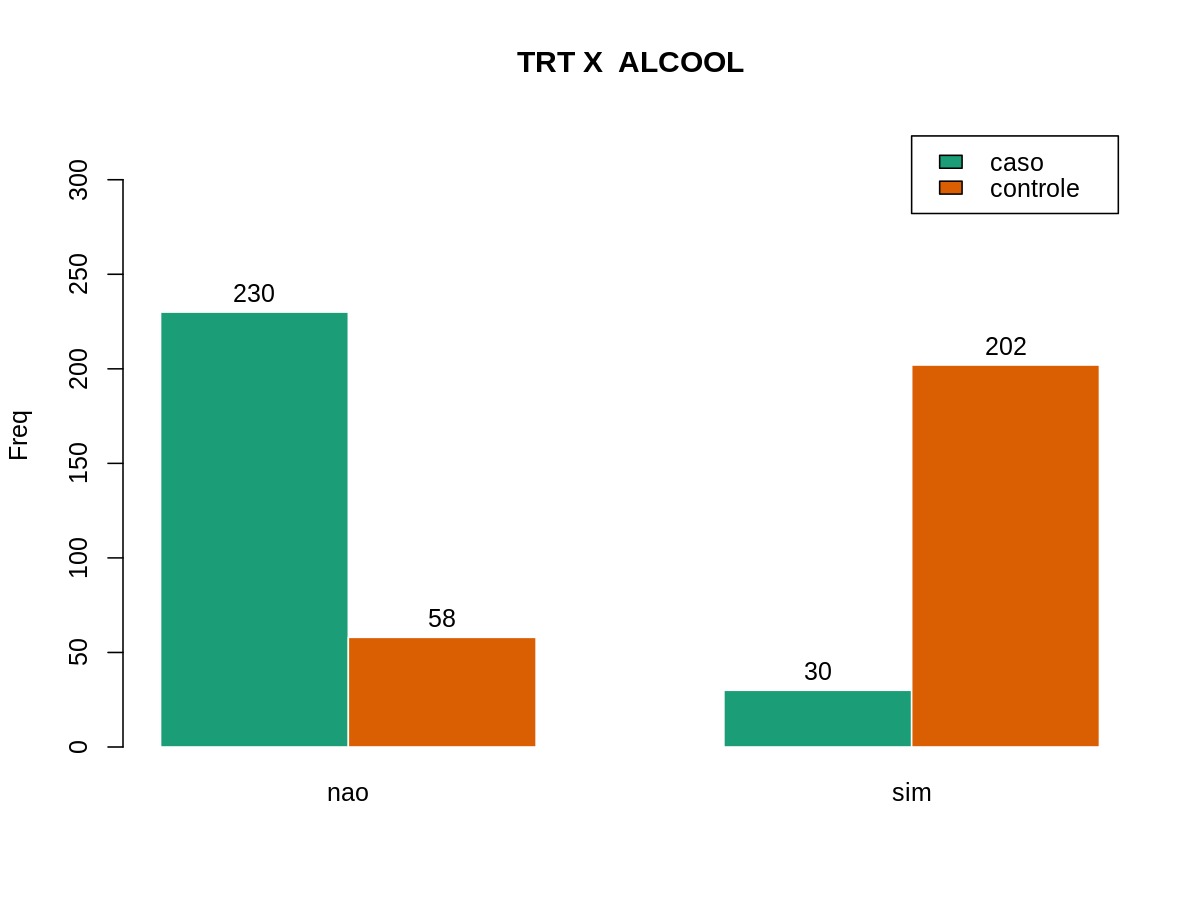

Warning message in brewer.pal(n = length(tabH), name = "Dark2"):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


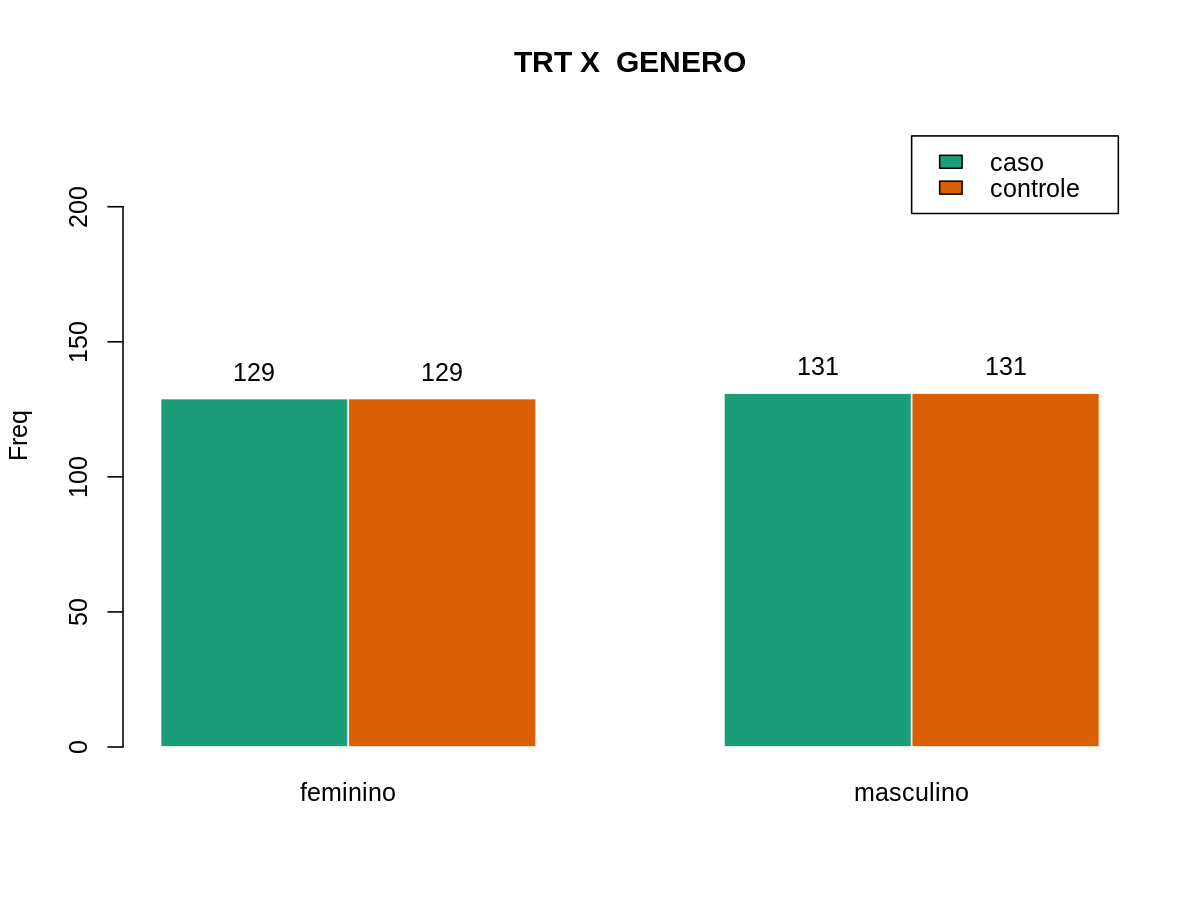

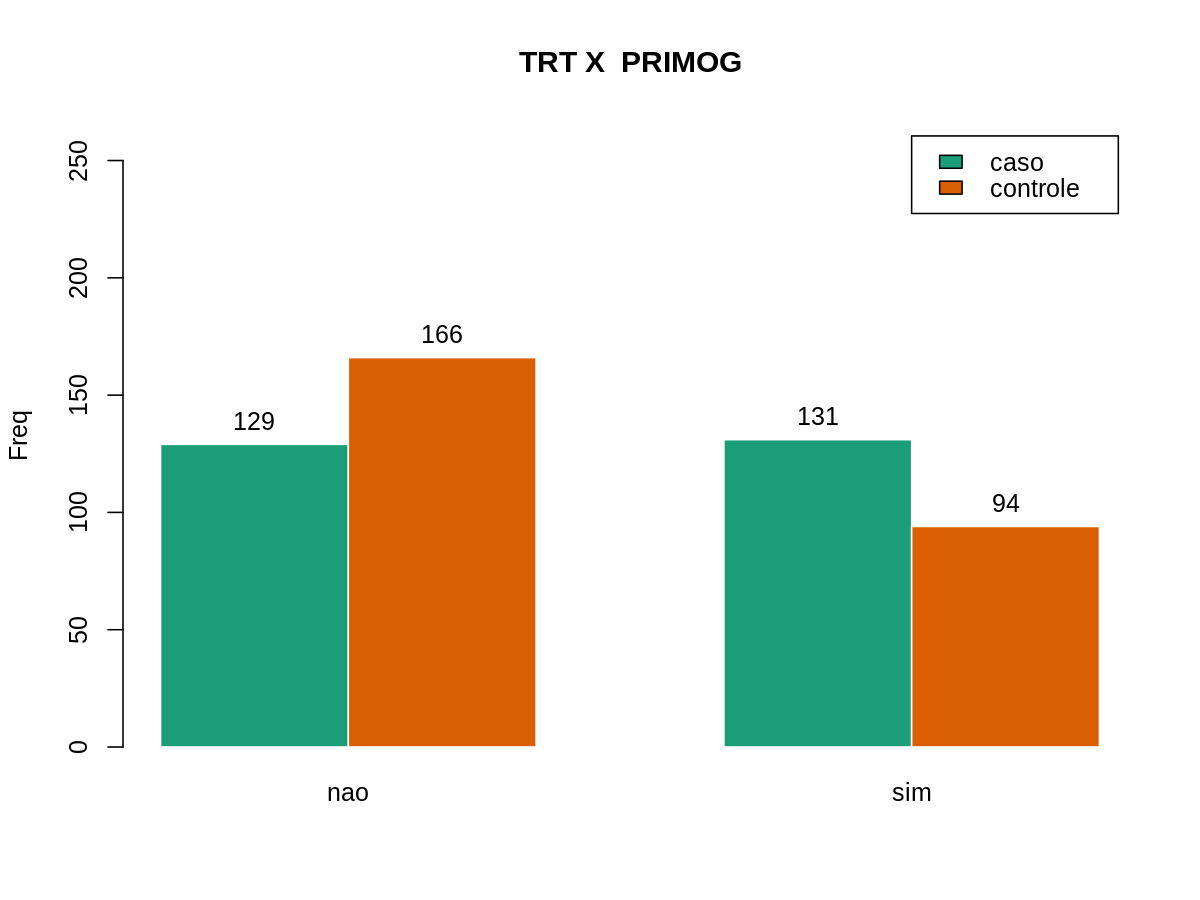

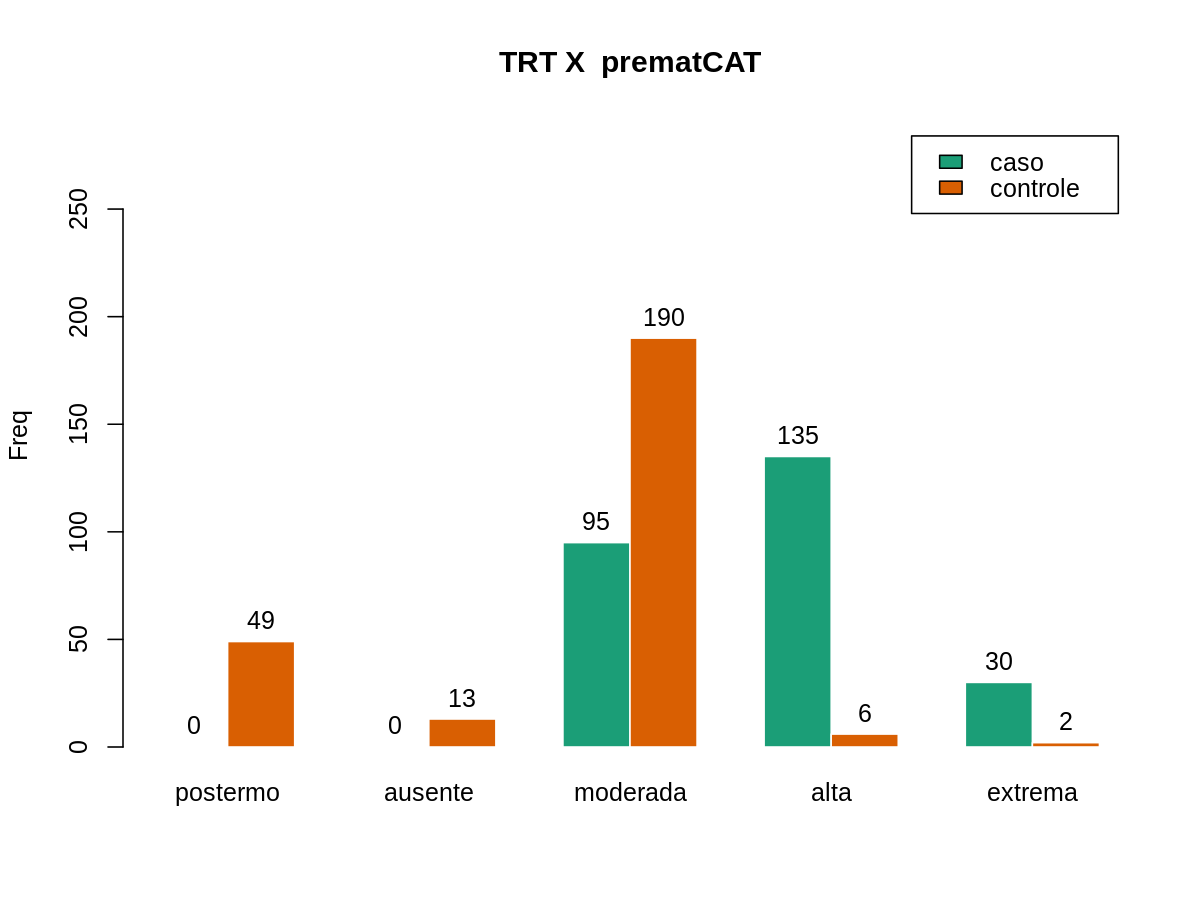

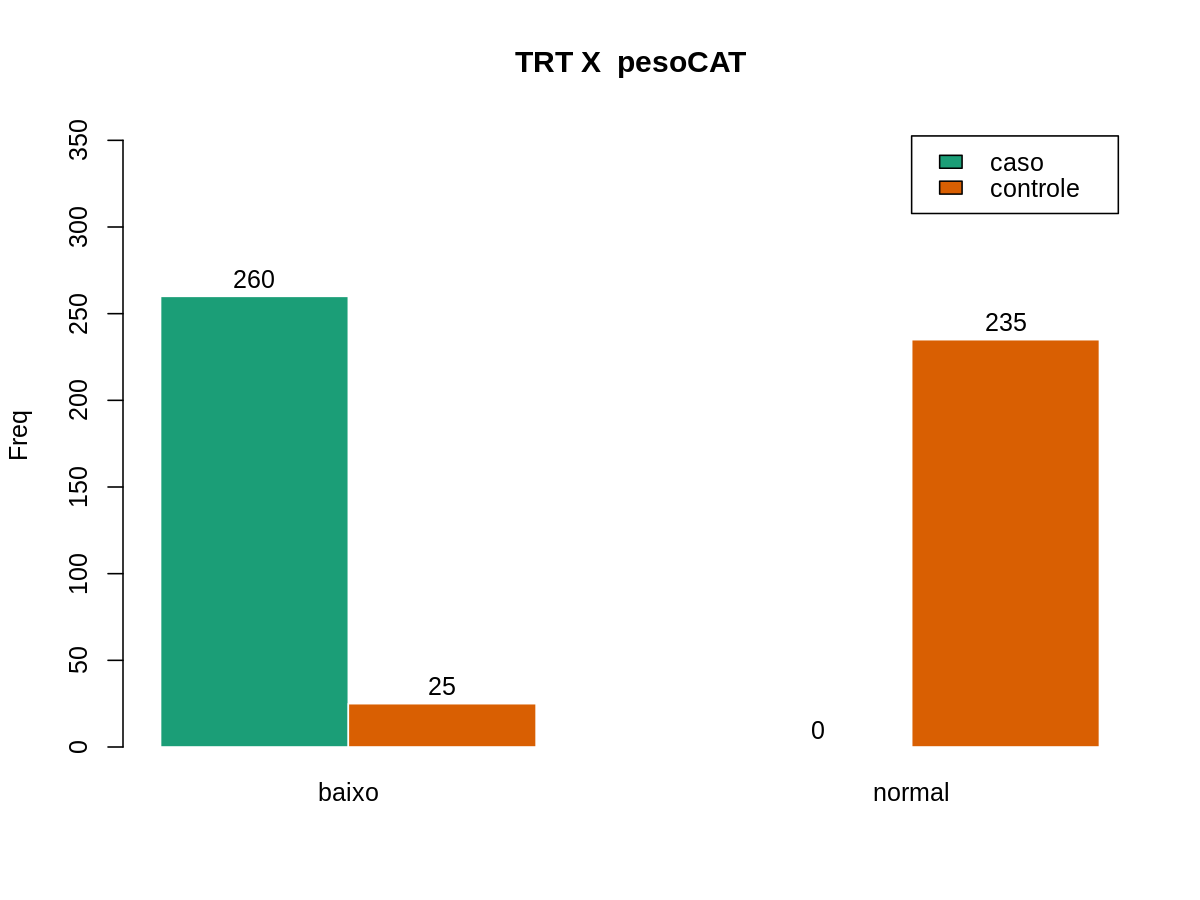

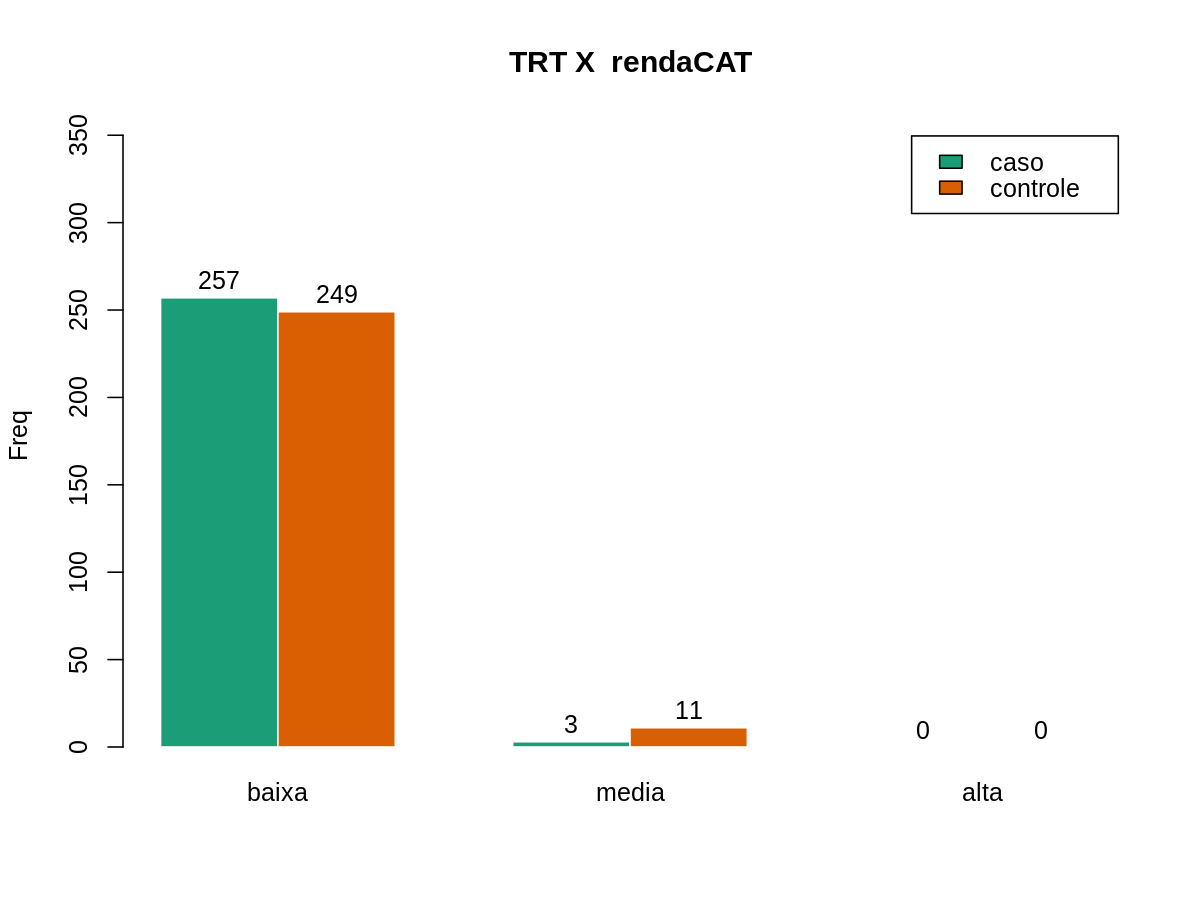

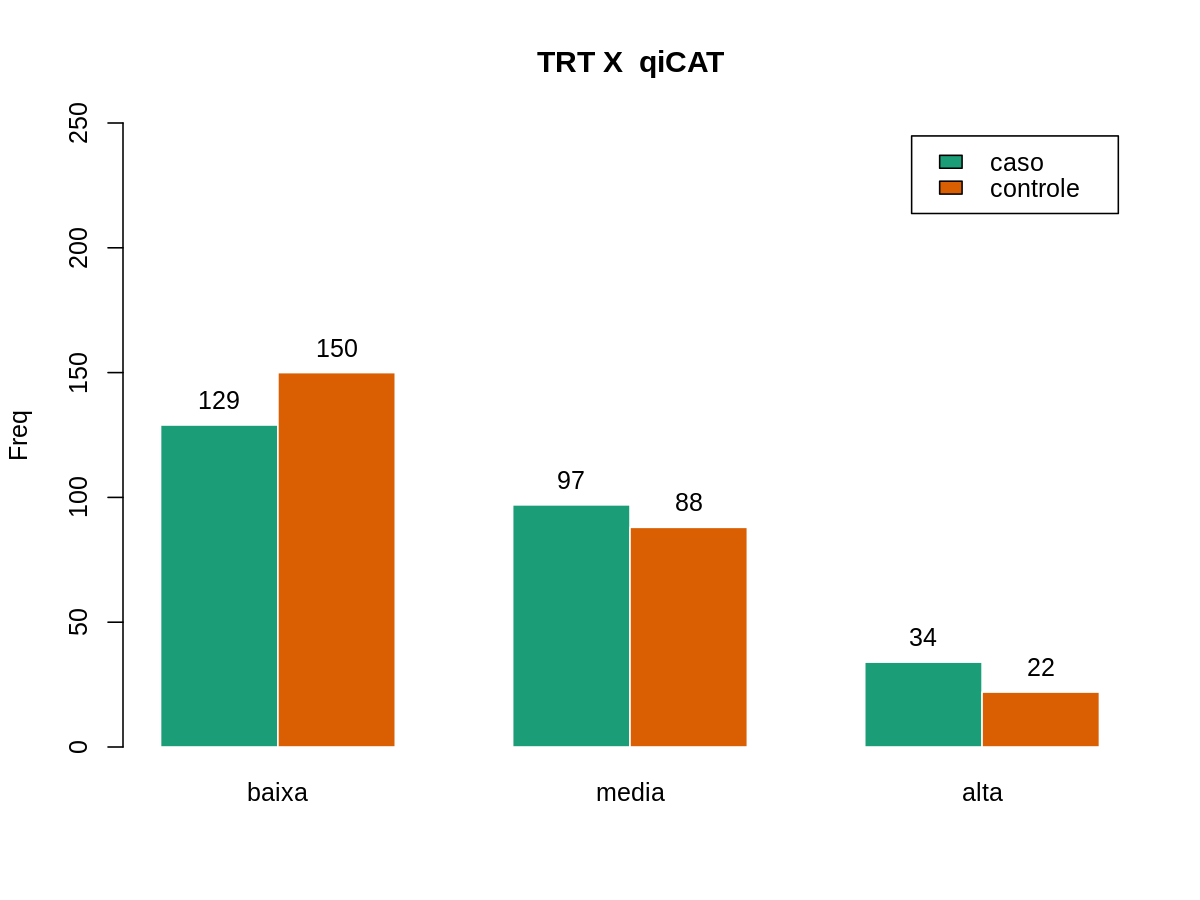

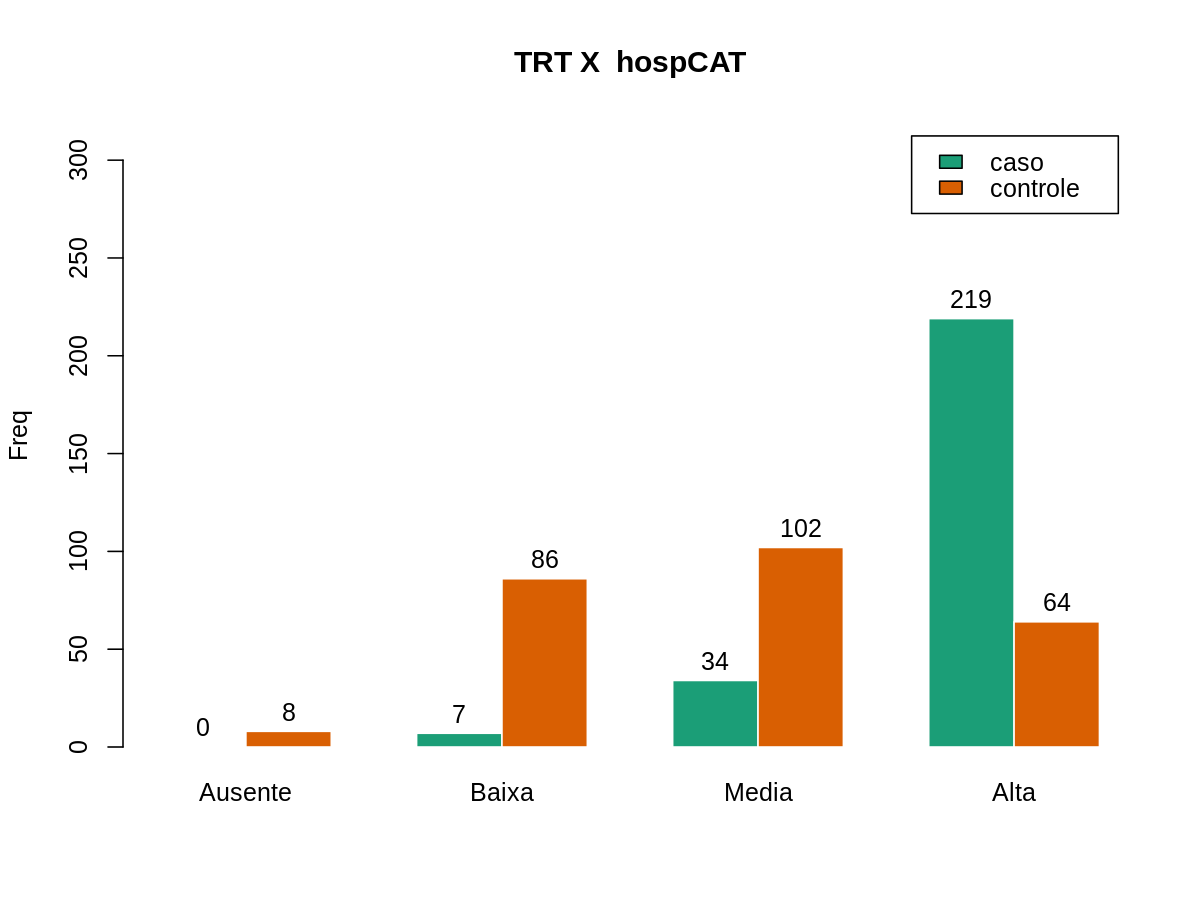

In [34]:
# Chamando a Função para gerar o grafico de barras
generate_bar_plots(IHPD_bal)


Como pode ser observado pelos gráficos, pode-se notar que que há um perfeito balanceamento quando se considera o Genero, ja na hospitalização percebemos um certo desbalanceamento visto que o grupo caso, os bebes passam um bom período hospitalizado, validando assim a estratégia adotada de não se retirar dados da hospitalização, notamos também um certo desbalanceamento no peso, tendo uma boa parte das observações do grupo controle com bebês de peso Normal, contudo como fazia parte da estratégia de não balancear o peso, o alcool tem um comportamento também oposto entre os grupos. As demais variáveis apresentam um bom balanceamento entre os seus subsestratos.

# 4.   QUESTÃO (2,5 Pontos)
O programa IHDP visava reduzir o atraso cognitivo e comportamental, superficialmente traduzindo pelo QI, de crianças prematuras de baixo peso. Prove graficamente a eficácia do programa comparando com o tratamento pediátrico padrão.



Para realizar essa análise, serão gerados os gráficos de boxplot para a variável qi e um gráfico de dispersão entre as variáveis QIxHospxPeso.

Gráfico do Boxplot

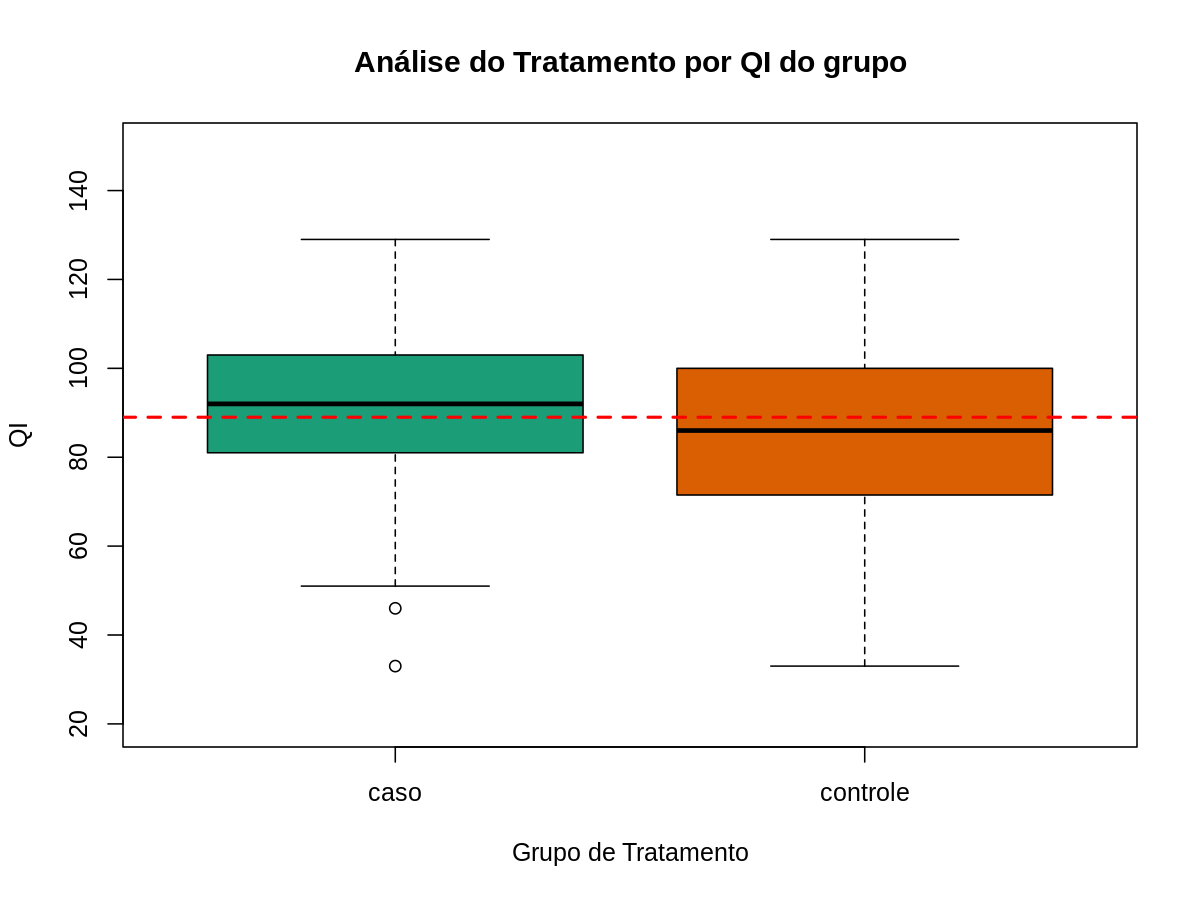

In [35]:
# Abre o arquivo

# Define área e resolução de saída da plotagem do gráfico
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 150)

# Gráfico de barra com pacote GRAPHICS
# https://r-graph-gallery.com/38-rcolorbrewers-palettes.html
# https://htmlcolorcodes.com/color-chart/
pacman::p_load('RColorBrewer')
colors <- brewer.pal(n = length(unique(IHPD_bal$hospCAT)), name = "Dark2")

# Diagrama de caixa com pacote GRAPHICS
boxplot(
    formula = QI ~ TRT,
    data = IHPD_bal,
    main = 'Análise do Tratamento por QI do grupo',
    ylab = 'QI',
    xlab = 'Grupo de Tratamento',
    ylim = c(20,150),
    col = colors
)
abline(h=median(IHPD_bal$QI), col='red', lty=2, lwd=2)
# Fecha o arquivo


Como pode ser observado pelo gráfico de boxplot, nota-se no Grupo Caso que mais de 50% das observações apresentam um QI acima da média, contudo, apresenta dois valores abaixos do limite inferior.  Já no Grupo controle, pode-se afirmar que menos de 50% apresentam um QI acima da média. Podendo ser um bom indicativo que o tratamento no grupo caso surgiu efeito.

Warning message in brewer.pal(n = length(unique(IHPD_bal$TRT)), name = "Dark2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


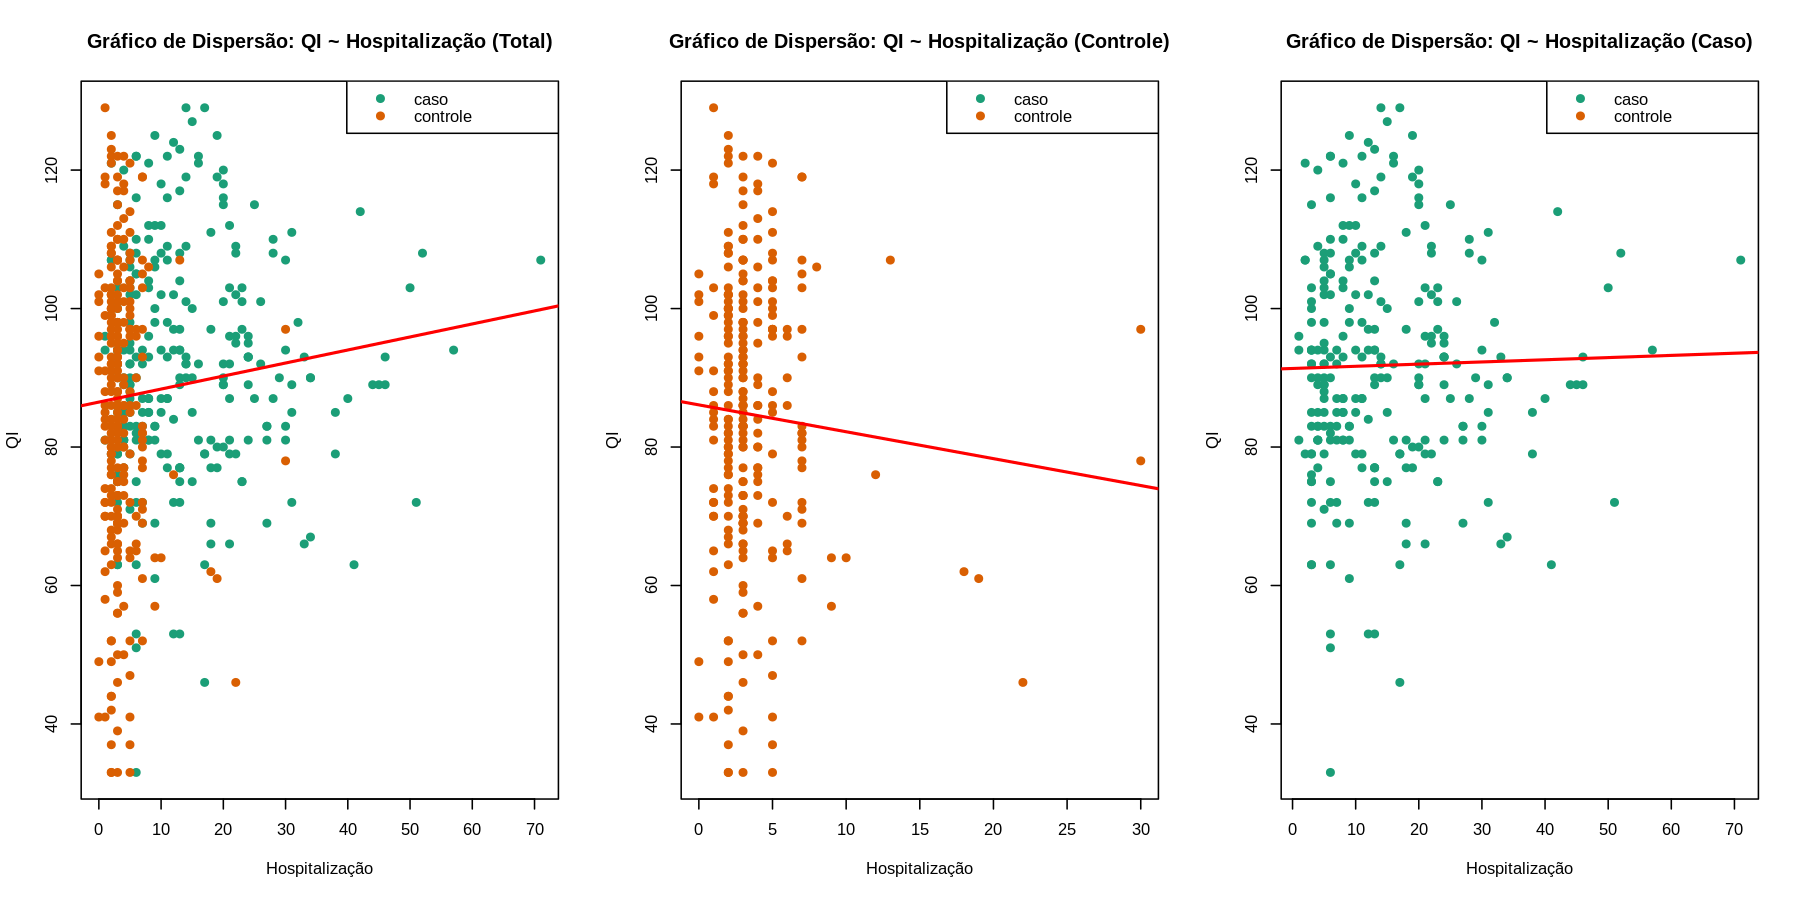

In [36]:
# Abre o arquivo

# Define área e resolução de saída da plotagem do gráfico
options(repr.plot.width=12, repr.plot.height=6, repr.plot.res = 150)
colors <- brewer.pal(n = length(unique(IHPD_bal$TRT)), name = "Dark2")
# Plotando os 3 graficos na mesma pagina
par(mfrow=c(1,3))

#Dados Gerais
formula = (QI ~ HOSP)
plot(IHPD_bal$HOSP, IHPD_bal$QI,
     main = "Gráfico de Dispersão: QI ~ Hospitalização (Total)",
     xlab = "Hospitalização",
     ylab = "QI",
     col = colors[factor(IHPD_bal$TRT)],
     pch = 19)

abline(lm(formula, data=IHPD_bal), col='red', lwd=2)
legend(
  "topright",
   legend = levels(IHPD_bal$TRT),
    col = colors,
    pch = 19
    )

#Grupo Controle
formula = (QI ~ HOSP)
plot(CTRL_bal$HOSP, CTRL_bal$QI,
     main = "Gráfico de Dispersão: QI ~ Hospitalização (Controle)",
     xlab = "Hospitalização",
     ylab = "QI",
     col  = c('#d95f02'),
     pch = 19)

abline(lm(formula, data=CTRL_bal), col='red', lwd=2)
legend(
  "topright",
   legend = levels(CTRL_bal$TRT),
    col = c('#1b9e77','#d95f02'),
    pch = 19
    )

#GRUPO CASO
formula = (QI ~ HOSP)
plot(CASO_bal$HOSP, CASO_bal$QI,
     main = "Gráfico de Dispersão: QI ~ Hospitalização (Caso)",
     xlab = "Hospitalização",
     ylab = "QI",
     col = c('#1b9e77'),
     pch = 19)

abline(lm(formula, data=CASO_bal), col='red', lwd=2)
legend(
  "topright",
   legend = levels(CASO_bal$TRT),
    col = colors,
    pch = 19
    )

# Fecha o arquivo


Como visto no gráfico de dispersão, o grupo caso possui uma maior agrupamento dos dados de QI x HOSP com a reta, enquanto do grupo controle os dados estão mais dispersos. Contudo, apenas pelo grafico de dispersão não se pode afirmar estatisticamente que o tratamento resultou em uma melhora do QI, embora tenha alguns indicios com o gráfico da dispersão e do boxplot.